In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

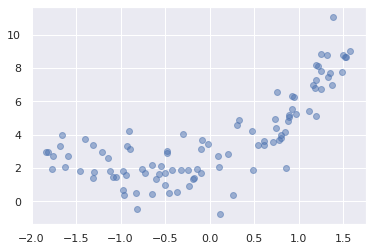

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X+2 + np.random.randn(m, 1)

skala = StandardScaler() # Menggunakan Normalisaasi
X = skala.fit_transform(X)

plt.scatter(X,y, alpha=0.5);

In [3]:
# poly_pipe = Pipeline((
#     ("poly_features", PolynomialFeatures(degree=3)),
#     ("skala", StandardScaler()),
#     ("model", LinearRegression())
# ))

# poly_pipe.fit(X, y)

In [29]:
poly_features = PolynomialFeatures(degree=8, include_bias=True)
X_poly = poly_features.fit_transform(X)
X_poly[0]


array([  1.        ,  -1.65447953,   2.73730252,  -4.52881098,
         7.49282507, -12.3967257 ,  20.51012891, -33.93358844,
        56.14242747])

In [30]:
model = LinearRegression()
model.fit(X_poly, y)
model.intercept_, model.coef_

(array([2.30324772]),
 array([[ 0.        ,  1.55534971,  0.25125004,  0.07824564,  1.68301116,
          0.44670196, -0.48042962, -0.17412172, -0.00561184]]))

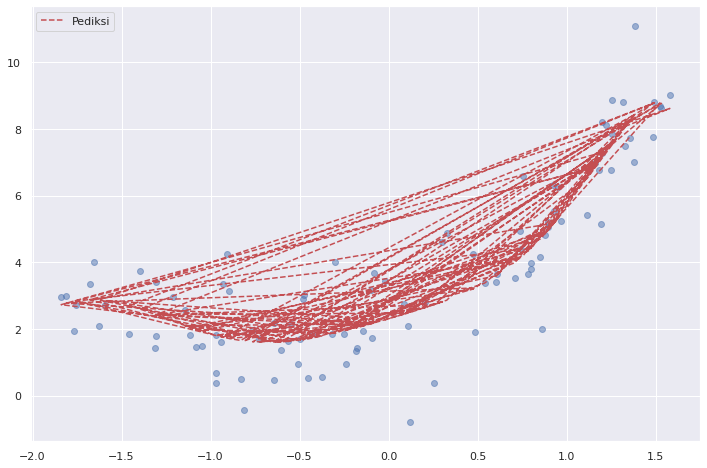

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X,y, alpha=0.5)
plt.plot(X, model.predict(X_poly),"r--", label="Pediksi")
plt.legend();

In [32]:
a = np.array([0.56]).reshape(1,-1)
model.predict(poly_features.fit_transform(a))

array([[3.43901528]])

In [33]:
model.score(X_poly, y)

0.8234081503925933